In [1]:
using Plots, Polynomials, SpecialPolynomials, LinearAlgebra, DataFrames, CSV, Statistics

## zad.1
Narysować 6 pierwszych wielomianów Hermita (na jednym wykresie albo siatce 2x3 lub 3x2)

In [2]:
h(i) = basis(Hermite, i)

h (generic function with 1 method)

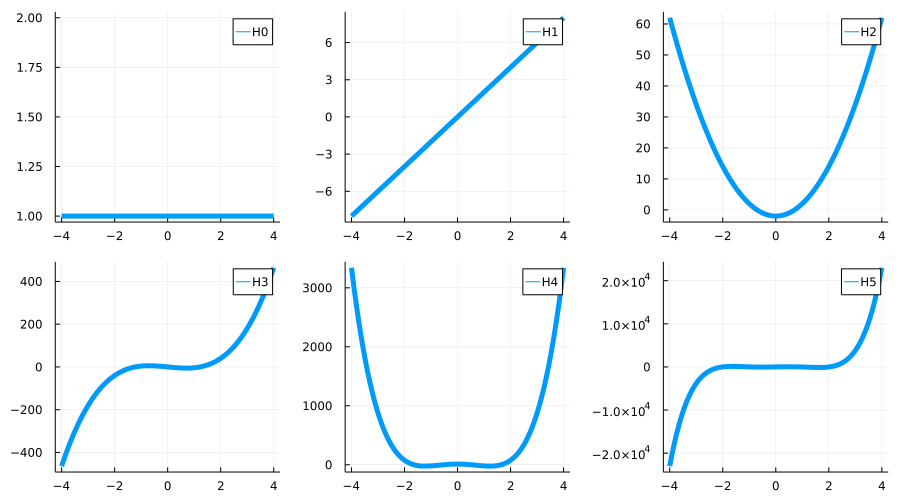

In [3]:
plot([x -> h(i)(x) for i in 0:5], -4, 4, size=(900, 500),
    labels = ["H0" "H1" "H2" "H3" "H4" "H5"], layout=6, width=5)

## zad.2
Narysować 6 pierwszych funkcji aproksymujących

In [4]:
X = -4:0.01:4

-4.0:0.01:4.0

In [5]:
function base_fun(k, x, norm=true)
    H_k = basis(Hermite, k).(x)
    app = H_k .* exp.(-(x.^2)/2)
    # normalize to have norm 1
    if norm
        return normalize(app)
    end
    return app
end

base_fun (generic function with 2 methods)

In [6]:
f(i) = base_fun(i, X)

f (generic function with 1 method)

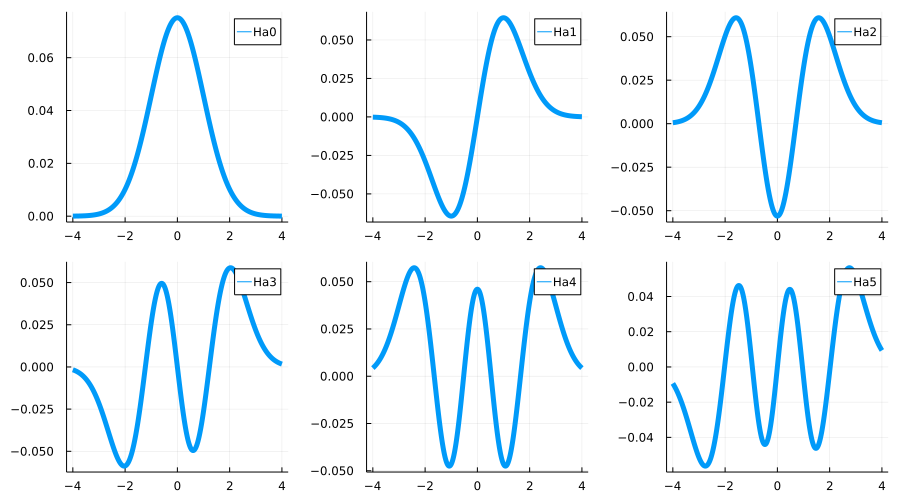

In [7]:
plot(X, [f(i) for i in 0:5], 
    labels = ["Ha0" "Ha1" "Ha2" "Ha3" "Ha4" "Ha5"],
    layout=6, width=5, size=(900, 500))

## zad.3
Pokazać, że same wielomiany nie są ortogonane, ale już z funkcją wagową $ exp(-x^{2}) $ są. Uzyć metody z wektorami wartości, założyć pewien przedział.

Sprawdzam iloczyny skalarne wielomianow bez wag:

In [8]:
test_range = -5:0.01:5

-5.0:0.01:5.0

In [9]:
h_val = [normalize(h(i).(test_range)) for i in 0:9]

dot_test = Array{Float64, 2}(undef, 10, 10)

for (i, h_i) in enumerate(h_val)
    for (j, h_j) in enumerate(h_val)
        dot_test[i, j] = dot(h_i, h_j)
    end
end

dot_test

10×10 Matrix{Float64}:
  1.0          -6.22447e-18   0.724494     …   0.408096     -1.4536e-19
 -6.22447e-18   1.0           2.26569e-17      8.39239e-18   0.613983
  0.724494      2.26569e-17   1.0              0.787746      6.81664e-18
 -4.58183e-18   0.899824     -9.23471e-18     -4.12329e-17   0.838127
  0.569674      1.61933e-18   0.947992         0.927814     -2.10188e-17
 -8.41853e-18   0.785838     -2.28238e-17  …   2.79697e-17   0.940747
  0.475246     -1.04616e-17   0.867174         0.985121      6.1616e-18
  5.57218e-18   0.692503     -3.97202e-18      3.26037e-17   0.987099
  0.408096      8.39239e-18   0.787746         1.0          -7.32935e-17
 -1.4536e-19    0.613983      6.81664e-18     -7.32935e-17   1.0

Niektóre iloczyny skalarne, poza główną przekątną, znacząco odbiegają od 0, zatem widzimy, że wielomiany nie są ortogonalne

In [10]:
f_val = [base_fun(i, test_range) for i in 0:9]

dot_test_w = Array{Float64, 2}(undef, 10, 10)

for (i, f_i) in enumerate(f_val)
    for (j, f_j) in enumerate(f_val)
        dot_test_w[i, j] = dot(f_i, f_j)
    end
end

dot_test_w

10×10 Matrix{Float64}:
  1.0          -1.28479e-18  -5.27334e-11  …  -2.90542e-8    6.00706e-19
 -1.28479e-18   1.0           5.31317e-18     -1.41663e-18  -4.16958e-7
 -5.27334e-11   5.31317e-18   1.0             -1.05729e-6   -4.01456e-18
  8.37625e-19  -1.52538e-9   -8.56829e-18      6.57913e-18  -8.44229e-6
 -7.17021e-10  -2.94442e-18  -2.59736e-8      -1.45073e-5   -2.52235e-18
 -6.47107e-19  -1.53835e-8   -2.97485e-19  …   2.2814e-18   -8.6076e-5
 -5.62579e-9   -1.71525e-18  -2.04209e-7      -0.000115068  -8.59071e-19
  2.81005e-18  -9.70435e-8    6.95873e-18      8.76947e-19  -0.000550237
 -2.90542e-8   -1.41663e-18  -1.05729e-6       1.0           9.59598e-18
  6.00706e-19  -4.16958e-7   -4.01456e-18      9.59598e-18   1.0

Wszystkie iloczyny skalarne, poza główną przekątną, osiągają wartości bardzo bliskie 0, zatem możemy wywnioskować, że w tym przypadku wielomiany z funkcją wagową są ortogonalne

## zad.4
Dokonać aproksymacji zespołu QRS typu N oraz V za pomocą kilku kolejnych stopni. Przedstawić osobno wykresy dla N i V

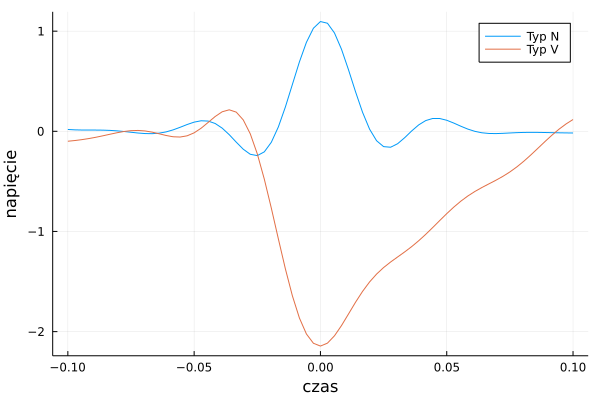

In [11]:
ekg_data = CSV.read("ecg_data.csv", DataFrame)
X_ekg = ekg_data.time * 40
Y_ekgN = ekg_data.signalN
Y_ekgV = ekg_data.signalV

plot(ekg_data.time, ekg_data.signalN, label="Typ N", xlabel = "czas", ylabel="napięcie")
plot!(ekg_data.time, ekg_data.signalV, label="Typ V")

In [12]:
function approx(X, Y; n=5)
    f = [base_fun(i, X) for i in 0:n-1]
    c = [dot(Y, f_i) for f_i in f]
    app = [c_i * f_i for (c_i, f_i) in zip(c, f)]
    cumulative_app = [sum(app[1:i]) for i in 1:length(app)]
end

approx (generic function with 1 method)

In [13]:
function plotApprox(X, Y; n=5, kwargs...)
    cumulative_app = approx(X, Y, n=n)
    labels = ["H$(i - 1)" for i in 1:n]
    labels = reshape(labels, 1, length(labels))
    plot(X, Y, markershape=:circle)
    plot!(X, cumulative_app; label=labels, kwargs...)
end

plotApprox (generic function with 1 method)

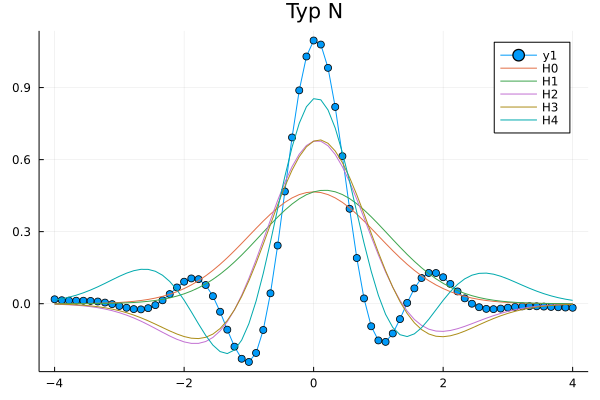

In [14]:
plotApprox(X_ekg, Y_ekgN; title="Typ N", legend=:topright)

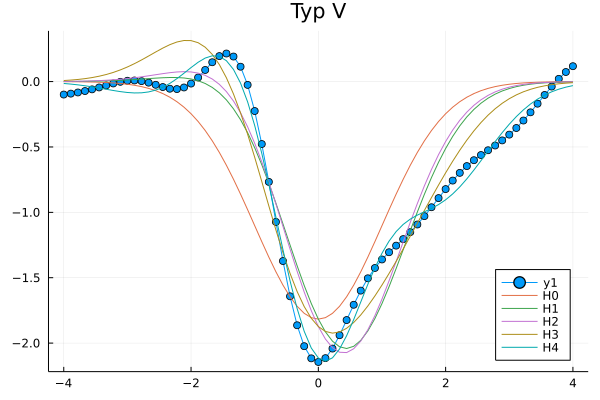

In [15]:
plotApprox(X_ekg, Y_ekgV; title="Typ V", legend=:bottomright)

## zad.5
Przedstawić wykres błędu aproksymacji w zależności od stopnia wielomianu dla stopni od 0 do 10. Jakiego stopnia należy użyć gdybyśmy mieli robić coś dalej z rezultatem aproksymacji?

In [16]:
mse(y1, y2) = mean((y1 - y2).^2)

mse (generic function with 1 method)

In [17]:
function plotErrors(X, Y; n=11, kwargs...)
    app = approx(X, Y; n=n)
    errors = [mse(Y, app_i) for app_i in app]
    xs = 0:n-1
    scatter(xs, errors; xticks=xs, kwargs...)
end

plotErrors (generic function with 1 method)

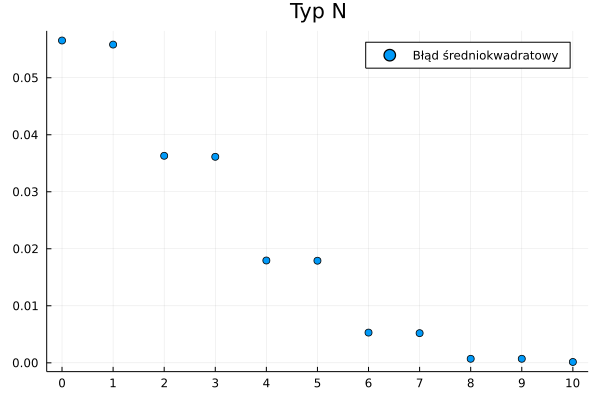

In [18]:
plotErrors(X_ekg, Y_ekgN, title="Typ N", label="Błąd średniokwadratowy")

W tym przypadku wielomian 8-mego stopnia zagwarantuje nam dobrą precyzję

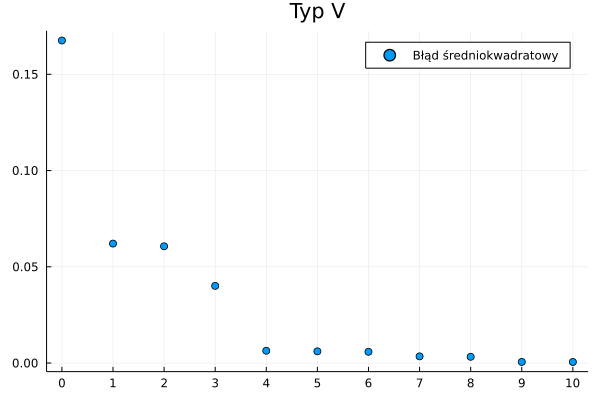

In [19]:
plotErrors(X_ekg, Y_ekgV, title="Typ V", label="Błąd średniokwadratowy")

W tym przypadku wielomian 9-tego stopnia powinien wystarczyć do otrzymania akceptowalnej dokładności